In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
from google.colab import files
uploaded=files.upload()

In [3]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")


In [4]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1.0,55.0,1885.0,136.83,152.29,0.0,0.0,177.0
1,1466964,1.0,55.0,1993.0,136.83,135.83,0.0,0.0,270.0
2,1346989,1.0,55.0,2539.0,134.86,135.86,0.0,0.0,189.0
3,1338232,1.0,55.0,2139.0,339.50,437.53,0.0,0.0,54.0
4,1448490,1.0,55.0,2631.0,243.50,242.50,0.0,0.0,40.0


In [5]:

test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103621 entries, 0 to 103620
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     103621 non-null  int64  
 1   week                   103620 non-null  float64
 2   center_id              103620 non-null  float64
 3   meal_id                103620 non-null  float64
 4   checkout_price         103620 non-null  float64
 5   base_price             103620 non-null  float64
 6   emailer_for_promotion  103620 non-null  float64
 7   homepage_featured      103620 non-null  float64
 8   num_orders             103620 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 7.1 MB


In [7]:
train['num_orders'].describe()

count    103620.000000
mean        261.858483
std         433.910688
min          13.000000
25%          54.000000
50%         136.000000
75%         323.000000
max       24299.000000
Name: num_orders, dtype: float64

In [8]:
train.isnull().sum()

id                       0
week                     1
center_id                1
meal_id                  1
checkout_price           1
base_price               1
emailer_for_promotion    1
homepage_featured        1
num_orders               1
dtype: int64

In [9]:
meal_info = pd.read_csv("/content/meal_info.csv")
center_info = pd.read_csv("/content/fulfilment_center_info.csv")

In [10]:
trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")
trainfinal = pd.merge(trainfinal, center_info, on="center_id", how="outer")

In [11]:
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560.0,1.0,55.0,1885.0,136.83,152.29,0.0,0.0,177.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0
1,1018704.0,2.0,55.0,1885.0,135.83,152.29,0.0,0.0,323.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0
2,1196273.0,3.0,55.0,1885.0,132.92,133.92,0.0,0.0,96.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0
3,1116527.0,4.0,55.0,1885.0,135.86,134.86,0.0,0.0,163.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0
4,1343872.0,5.0,55.0,1885.0,146.50,147.50,0.0,0.0,215.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0


In [12]:
trainfinal=trainfinal.drop(['center_id','meal_id'],axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560.0,1.0,136.83,152.29,0.0,0.0,177.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0
1,1018704.0,2.0,135.83,152.29,0.0,0.0,323.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0
2,1196273.0,3.0,132.92,133.92,0.0,0.0,96.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0
3,1116527.0,4.0,135.86,134.86,0.0,0.0,163.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0
4,1343872.0,5.0,146.50,147.50,0.0,0.0,215.0,Beverages,Thai,647.0,56.0,TYPE_C,2.0


In [13]:
cols=trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [14]:
cols=cols[:2]+cols[9:]+cols[7:9]+cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [15]:
trainfinal=trainfinal[cols]

In [16]:
trainfinal.dtypes

id                       float64
week                     float64
city_code                float64
region_code              float64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion    float64
homepage_featured        float64
num_orders               float64
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lb1=LabelEncoder()
trainfinal['center_type']=lb1.fit_transform(trainfinal['center_type'])
lb2=LabelEncoder()
trainfinal['category']=lb1.fit_transform(trainfinal['category'])
lb1=LabelEncoder()
trainfinal['cuisine']=lb1.fit_transform(trainfinal['cuisine'])


In [19]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560.0,1.0,647.0,56.0,2,2.0,0,3,136.83,152.29,0.0,0.0,177.0
1,1018704.0,2.0,647.0,56.0,2,2.0,0,3,135.83,152.29,0.0,0.0,323.0
2,1196273.0,3.0,647.0,56.0,2,2.0,0,3,132.92,133.92,0.0,0.0,96.0
3,1116527.0,4.0,647.0,56.0,2,2.0,0,3,135.86,134.86,0.0,0.0,163.0
4,1343872.0,5.0,647.0,56.0,2,2.0,0,3,146.50,147.50,0.0,0.0,215.0


In [20]:
trainfinal.shape

(103624, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'num_orders Distribution')

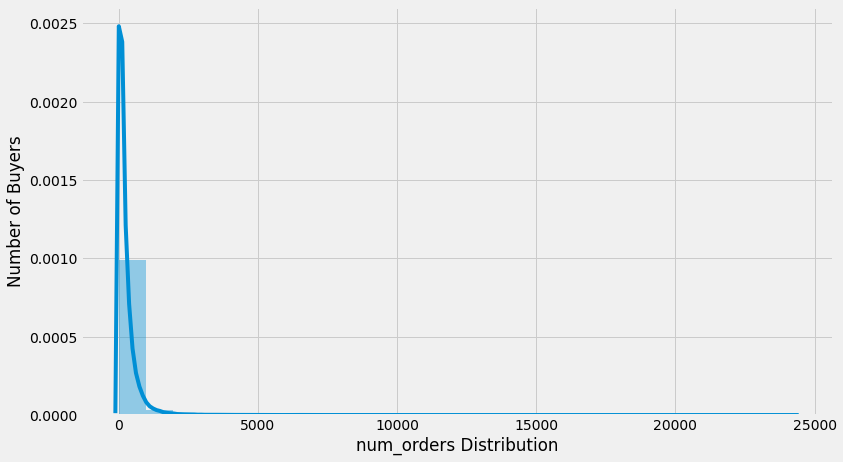

In [21]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sb.distplot(trainfinal.num_orders,bins=25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.xlabel("num_orders Distribution")

In [22]:
trainfinal2=trainfinal.drop(['id'],axis=1)
correlation=trainfinal2.corr(method='pearson')
columns=correlation.nlargest(8,'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

In [23]:
trainfinal2=trainfinal.drop(['id'],axis=1)
correlation=trainfinal2.corr(method='pearson')
columns=correlation.nlargest(8,'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

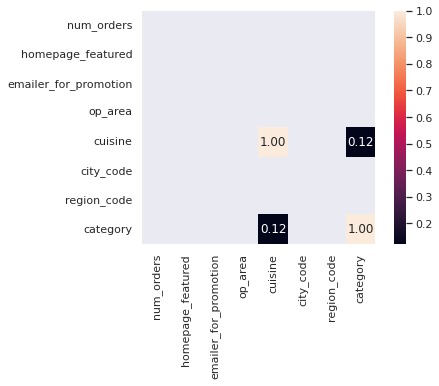

In [24]:
correlation_map=np.corrcoef(trainfinal[columns].values.T)
sb.set(font_scale=1.0)
heatmap=sb.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

In [25]:
features=columns.drop(['num_orders'])
trainfinal3=trainfinal[features]
x=trainfinal3.values
y=trainfinal['num_orders'].values

In [26]:
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0.0,0.0,2.0,3,647.0,56.0,0
1,0.0,0.0,2.0,3,647.0,56.0,0
2,0.0,0.0,2.0,3,647.0,56.0,0
3,0.0,0.0,2.0,3,647.0,56.0,0
4,0.0,0.0,2.0,3,647.0,56.0,0


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val=train_test_split(x,y,test_size=0.25)